In [ ]:
## TASK 1 

DONTPANIC

In [117]:
## TASK 2

import pandas as pd

data = pd.read_csv('/home/maria/Documents/Python/02_semester/MiddleTest/data_for_task2.csv')

In [118]:
data.head(5)

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [119]:
data = data.groupby('genus').mean() # 1) finding average values
data


,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [120]:
data = data.rename_axis("genus").reset_index()
data

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [121]:
import seaborn as sns # 2) making a plot

In [122]:
data_for_plot = pd.melt(
    frame = data,
    id_vars = "genus")

data_for_plot.head(15)

,genus,variable,value
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


[Text(0, 0, 'sucrose'),
 Text(1, 0, 'alanin'),
 Text(2, 0, 'citrate'),
 Text(3, 0, 'glucose'),
 Text(4, 0, 'oleic_acid')]

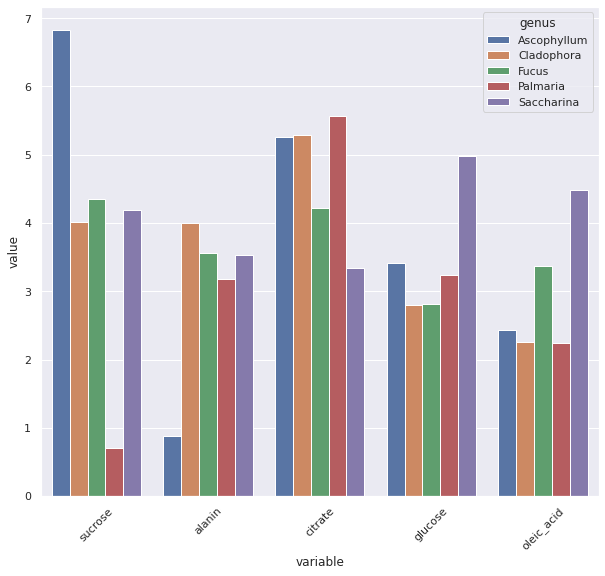

In [123]:
sns.set(rc={'figure.figsize':(10,9)})


g = sns.barplot(x = "variable",
                y = "value",
                hue = "genus", 
                data = data_for_plot)

# with readable x labels
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

In [150]:
## TASK 3

inp_list = [1,2,3,4,5,6] 

my_iter = map(lambda x: x%3 == 0, inp_list)

In [157]:
for el in my_iter:
    print(el)

In [185]:
while True:
    try:
        i = next(my_iter)
        print(i)
    except StopIteration:
        break

In [ ]:
# We may have some information which require a lot of memory.
# In this case we can use next(iter) and read pieces of information one by one without download it first.

In [163]:
## TASK 4 

In [245]:
import urllib.request

In [246]:
numbers = [ 22, 43, 264, 1990]

for number in numbers:
    response_math = requests.get(f"http://numbersapi.com/{number}/math?fragment").text
    response_date = requests.get(f"http://numbersapi.com/{number}/date?fragment").text
    
    print('MATH:', number, response_math)
    print('HIST:', number, response_date)

MATH: 22 a Smith number in base 10
HIST: 22 the Ashantis defeat British forces in the Gold Coast
MATH: 43 a centered heptagonal number
HIST: 43 Ecuador annexes the Galápagos Islands
MATH: 264 the largest known number whose square is undulating
HIST: 264 the National Football League players begin a 57-day strike
MATH: 1990 a stella octangula number
HIST: 1990 the Virginia Declaration of Rights is adopted


In [ ]:
## TASK 5

In [256]:
from cobra import test
model = test.create_test_model("textbook") # Name: e_coli_core

In [257]:
model

Name,e_coli_core
Memory address,0x07f54eed373a0
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [258]:
model.metabolites.nadh_c.summary(fva = 0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.271; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
13.14%,5.064,[0; 7.382],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.107; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
8.04%,3.1,[2.945; 3.1],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,[11.2; 17.79],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.073; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
13.14%,5.064,[0.3644; 13.55],MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
0.00%,0,[0; 6.885],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 25.82],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
24.09%,9.283,[3.903; 18.77],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c


In [259]:
getattr(model.genes, "b3236").knock_out()

In [260]:
model.optimize()
model.metabolites.nadh_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.513; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
18.46%,7.449,[0; 8.076],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.242; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
7.26%,2.929,[2.783; 2.929],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,[9.838; 17.91],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.188; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
1.83%,0.738,[0; 11.9],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 44.63],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
28.34%,11.43,[0.5791; 18.69],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Range,Reaction,Definition
